In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
class KNN():
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.y = y
        self.X = X 
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        dist_labels = np.zeros((self.X.shape[0], 2))
        dist_labels[:,1] = self.y
        for i, vec in enumerate(X):
            dist_labels[:,0] = np.linalg.norm(self.X - vec, axis = 1)
            closest_k_labels = dist_labels[dist_labels[:,0].argsort()][:self.k, 1]
            counts = np.bincount(closest_k_labels.astype(int))
            y[i] =  np.argmax(counts)
        return y
        
    def score(self):
        return np.mean(self.predict(self.X) == self.y)

## Circles

(1000, 2)


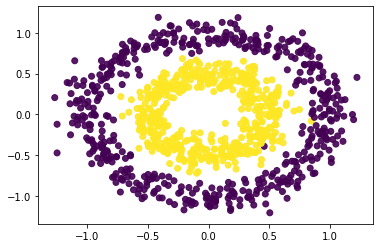

In [55]:
from sklearn.datasets import make_circles, make_moons, make_blobs, make_checkerboard

n = 1000
n_test = int(n*0.8)
#X, y = make_blobs(n_samples=n, centers=3, n_features=2,
#random_state=0)
X, y = make_circles(n_samples=n,  factor=.5,
                                      noise=.1)
print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.9)
plt.show() 

In [56]:
X_train, y_train = X[:n_test], y[:n_test]
X_test, y_test = X[n_test:], y[n_test:]

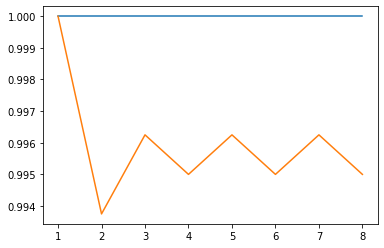

In [58]:
train_acc_history = []
test_acc_history = []

max_k = 8

for i in range(1,max_k + 1):
    model = KNN(i)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_acc = np.mean(model.predict(X_test) == y_test)
    test_acc_history.append(test_acc)
    train_acc_history.append(model.score())

sns.lineplot(range(1,max_k + 1), test_acc_history)
sns.lineplot(range(1,max_k + 1), train_acc_history)

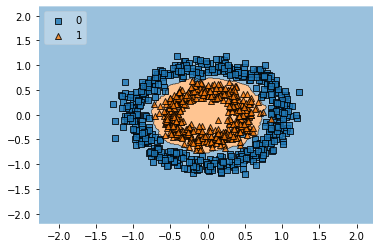

In [59]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf = model, legend = 2)
plt.show()

## Moons

(1000, 2)


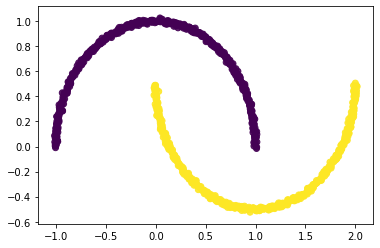

In [60]:
X, y = make_moons(n_samples=n, noise=.01)
print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.9)
plt.show() 

In [61]:
X_train, y_train = X[:n_test], y[:n_test]
X_test, y_test = X[n_test:], y[n_test:]

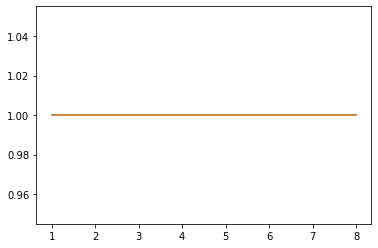

In [62]:
train_acc_history = []
test_acc_history = []

max_k = 8

for i in range(1,max_k + 1):
    model = KNN(i)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_acc = np.mean(model.predict(X_test) == y_test)
    test_acc_history.append(test_acc)
    train_acc_history.append(model.score())

sns.lineplot(range(1,max_k + 1), test_acc_history)
sns.lineplot(range(1,max_k + 1), train_acc_history)

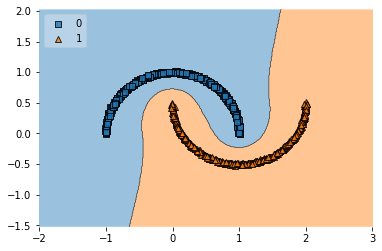

In [63]:
plot_decision_regions(X, y, clf = model, legend = 2)
plt.show()

# Squares

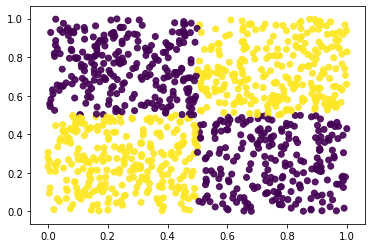

In [64]:
X = np.random.rand(n, 2)
y = np.zeros(n)
for i, point in enumerate(X):
    if (point[0] > 0.5 and point[1] > 0.5) or (point[0] < 0.5 and point[1] < 0.5  ):
        y[i] = 1
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.9)
plt.show() 

In [65]:
X_train, y_train = X[:n_test], y[:n_test]
X_test, y_test = X[n_test:], y[n_test:]

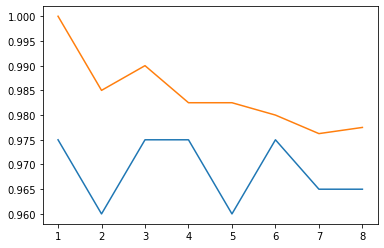

In [66]:
train_acc_history = []
test_acc_history = []

max_k = 8

for i in range(1,max_k + 1):
    model = KNN(i)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_acc = np.mean(model.predict(X_test) == y_test)
    test_acc_history.append(test_acc)
    train_acc_history.append(model.score())

sns.lineplot(range(1,max_k + 1), test_acc_history)
sns.lineplot(range(1,max_k + 1), train_acc_history)

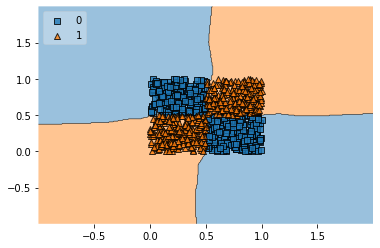

In [69]:
plot_decision_regions(X, y.astype(np.integer), clf = model, legend = 2)
plt.show()

# Metrics 

In [94]:
C="Cat"
F="Fish"
H="Hen"

# истинные значения
y_true = np.array([C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H])

# результат системы
y_pred = np.array([C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H])

### Accuracy

In [95]:
np.mean(y_true == y_pred)

0.48

### Confusion matrix

In [105]:
conf_mat = [[0, 0, 0], [0, 0,0], [0,0,0]]
labels = {"Cat":0, "Fish":1, "Hen":2}

for i in range(len(y_true)):            
    conf_mat[labels[y_true[i]]][labels[y_pred[i]]] += 1
conf_mat

[[4, 1, 1], [6, 2, 2], [3, 0, 6]]

### Precision, recall, f1-score

In [109]:
metrics = np.zeros((3,4))

metrics[:, 1] =[conf_mat[i][i]/(sum(conf_mat[i])) for i in range(len(conf_mat))]
metrics[:, 0] = [conf_mat[i][i]/(conf_mat[0][i] + conf_mat[1][i] + conf_mat[2][i]) for i in range(len(conf_mat))]
metrics[:, 2] = [ 2*conf_mat[i][i]/(sum(conf_mat[i]) + conf_mat[0][i] + conf_mat[1][i] + conf_mat[2][i]) for i in range(len(conf_mat))]
metrics[:, 3] = [sum(conf_mat[i]) for i in range(len(conf_mat))]
metrics

array([[ 0.30769231,  0.66666667,  0.42105263,  6.        ],
       [ 0.66666667,  0.2       ,  0.30769231, 10.        ],
       [ 0.66666667,  0.66666667,  0.66666667,  9.        ]])

### Macro metrics

In [88]:
macro_avg = [np.mean(metrics[:,i]) for i in range(len(metrics))] 
macro_avg

[0.547008547008547, 0.5111111111111111, 0.46513720197930725]

### Weighted metrics

In [102]:
weighted_avg = [(1/len(y_true))*metrics[:,i]@metrics[:, -1] for i in range(len(metrics)) ]
weighted_avg

[0.5805128205128205, 0.48, 0.4641295546558704]